In [72]:
import caffe
import time
import numpy as np
import sys
import os
import random
%matplotlib inline 
import matplotlib.pyplot as plt
import math

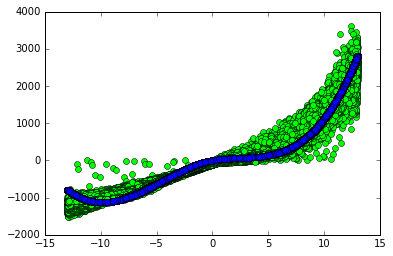

In [79]:
caffe.set_mode_cpu()
#caffe.set_device(1)


solver 			= caffe.get_solver("/home/sharpy/local-net/jupyter/tests/elu/elu-func-solver.prototxt")

x_c, y_c = [], []
x2, y2 = [], []
for i in xrange(1,300000):
    x = random.uniform(-13, 13)
    #print rnd
    solver.net.blobs['in' ].data[ 0 ] = x
    #rnd-=2
    #solver.net.blobs['out'].data[ 0 ] = max(0, math.sqrt(rnd*rnd))
    #solver.net.blobs['out'].data[ 0 ] = math.sqrt(rnd*rnd)
    #solver.net.blobs['out'].data[ 0 ] = max(3, math.sqrt(rnd*rnd))
    solver.net.blobs['out'].data[ 0 ] = 0.2*x*(2 + x*x) - 10*x*(x-5)+x*2 + abs(x*x*(x+2)*2) -x*x*10
    x_c.extend( solver.net.blobs['in' ].data[ 0 ] )
    y_c.extend( solver.net.blobs['out'].data[ 0 ] )
    #print x[-1]
    solver.step(1)
    x2.extend( solver.net.blobs['in' ].data[ 0 ] )
    y2.extend( solver.net.blobs['predicted_out'].data[ 0 ] )

plt.figure(1)
plt.plot(x2, y2, linestyle='none', marker='o', color='#00FF00' )
plt.plot(x_c, y_c, linestyle='none', marker='o', color='blue' )

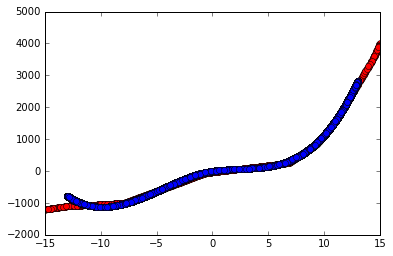

In [80]:
x1, y1 = [], []
#slices = "ABCDE"

y_maxout = {}
#for letter in slices:
#    y_maxout[letter] = []


for i in xrange(1,2000):
    rnd = random.uniform(-15, 15)
    #print rnd
    solver.net.blobs['in' ].data[ 0 ] = rnd
    solver.net.forward()
    x1.extend( solver.net.blobs['in' ].data[ 0 ] )
    y1.extend( solver.net.blobs['predicted_out'].data[ 0 ] )
#    for letter in slices:
        #y_maxout[letter].extend( [ solver.net.blobs['slice5'+letter].data[ 0 ][0] ] )
#        y_maxout[letter].extend( [ solver.net.blobs['slice5'+letter].data[ 0 ][0]
#                                  * solver.net.params['predicted_out'][0].data[0]
#                                  + solver.net.params['predicted_out'][1].data[0]  ]  )
        #y1_1.extend( solver.net.blobs['slice5A'].data[ 0 ] )
        #y1_2.extend( solver.net.blobs['slice5A'].data[ 0 ] )
    #print x[-1]
    
plt.figure(1)
#for letter in slices:
#    r = lambda: random.randint(0,255)
    #print('#%02X%02X%02X' % (r(),r(),r()))
#    plt.plot(x1, y_maxout[letter], linestyle='none', marker='o', color='#'+letter+letter
#             +letter+letter+'00' )
plt.plot(x1, y1, linestyle='none', marker='o', color='red' )
plt.plot(x_c, y_c, linestyle='none', marker='o', color='blue' )


#y_maxout = {}
#for letter in slices:
    #y_maxout.append([])
#    y_maxout[letter] = [solver.net.blobs['slice5'+letter].data[ 0 ][0]]
    #print key
#print y_maxout